In [1]:
"""
<분류 모델>
 - 앙상블 모델들을 주로 사용
 - 랜덤포레스트, 엑스트라트리, 그레디언트부스팅, 히스트그레디언트부스팅, XGBoosting, 이외 다수
 - 앙상블 모델의 대표 모델은 랜덤포레스트 모델
 - 훈련시 램덤포레스트 모델 훈련 후 나머지 모델 훈련...
 - 훈련 후 -> 편가하여 비교 후 -> 최종 분류 모델 선정
 - 평가 함수 : 정확도, 정밀도, 재현율, F1-Score 
 - 선정 우선순위 : F1-Score > 재현율 이중 정확도 확인하여 선정
"""

'\n<분류 모델>\n - 앙상블 모델들을 주로 사용\n - 랜덤포레스트, 엑스트라트리, 그레디언트부스팅, 히스트그레디언트부스팅, XGBoosting, 이외 다수\n - 앙상블 모델의 대표 모델은 랜덤포레스트 모델\n - 훈련시 램덤포레스트 모델 훈련 후 나머지 모델 훈련...\n - 훈련 후 -> 편가하여 비교 후 -> 최종 분류 모델 선정\n - 평가 함수 : 정확도, 정밀도, 재현율, F1-Score \n - 선정 우선순위 : F1-Score > 재현율 이중 정확도 확인하여 선정\n'

In [2]:
import pandas as pd

In [3]:
wine = pd.read_csv("./data/08_wine.csv")
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
import matplotlib.pyplot as plt

In [5]:
# data = wine.iloc[:, :3]
data = wine[["alcohol", "sugar", "pH"]].to_numpy()
target = wine["class"]
print(data.shape, target.shape)

(6497, 3) (6497,)


In [6]:
from scipy.stats import pearsonr

In [7]:
# for col_name in data.columns:
#     tmp = pearsonr(data[col_name], target)
#     print(col_name)
#     print(f"상관계수 계수값 : {tmp[0]:.3f}")
#     print(f"      p-value : {tmp[1]:.3f}")
#     print("-------------------------")

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(data, target,  test_size=0.2, random_state=42)

In [10]:
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(5197, 3) (1300, 3) (5197,) (1300,)


In [11]:
"""
<데이터 스케일링>
 - 특성들간의 서로다른 단위를 일정한 수준으로 맞추는 작업
 - 수치형 변수들에 대해서만 적용이 됨
 - 스케일링 3가지 방법(일반적으로 정규화라는 이름으로 아래 3가지 사용하기도 함)
  * 정규화 : StandardScaler(회귀 및 분류 모두 사용가능), RobustScaler(회귀 및 분류 모두 사용가능)
  * 표준화 : MinMaxScaler (회귀에서 사용)
 - 훈련 시에 스케일링 방법에 따라 독립변수를 각각 구성하여 훈현에 적용 후 정확도 비교 하기도 함...
"""

'\n<데이터 스케일링>\n - 특성들간의 서로다른 단위를 일정한 수준으로 맞추는 작업\n - 수치형 변수들에 대해서만 적용이 됨\n - 스케일링 3가지 방법(일반적으로 정규화라는 이름으로 아래 3가지 사용하기도 함)\n  * 정규화 : StandardScaler(회귀 및 분류 모두 사용가능), RobustScaler(회귀 및 분류 모두 사용가능)\n  * 표준화 : MinMaxScaler (회귀에서 사용)\n - 훈련 시에 스케일링 방법에 따라 독립변수를 각각 구성하여 훈현에 적용 후 정확도 비교 하기도 함...\n'

In [12]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [13]:
scaler = StandardScaler()
scaler.fit(train_input)
train_std_scaled = scaler.transform(train_input)
test_std_scaled = scaler.transform(test_input)

scaler = MinMaxScaler()
scaler.fit(train_input)
train_mm_scaled = scaler.transform(train_input)
test_mm_scaled = scaler.transform(test_input)

scaler = RobustScaler()
scaler.fit(train_input)
train_rs_scaled = scaler.transform(train_input)
test_rs_scaled = scaler.transform(test_input)

In [14]:
rm_cla = RandomForestClassifier(n_jobs=-1, random_state=42)
rm_cla.fit(train_std_scaled, train_target)
train_score = rm_cla.score(train_std_scaled, train_target)
test_score = rm_cla.score(test_std_scaled, test_target)
# 과대적합이 조금 발생하고 있음( train_score - test_score 의 값이 10% 이상이다 )
train_score, test_score, train_score - test_score


(0.996921300750433, 0.8892307692307693, 0.10769053151966368)

In [15]:
# rm_cla = RandomForestClassifier(n_jobs=-1, random_state=42)
# rm_cla.fit(train__scaled, train_target)
# train_score = rm_cla.score(train_mm_scaled, train_target)
# test_score = rm_cla.score(test_mm_scaled, test_target)
# # 과대적합이 조금 발생하고 있음( train_score - test_score 의 값이 10% 이상이다 )
# train_score, test_score, train_score - test_score


In [16]:
# rf = RandomForestClassifier(n_jobs=-1, random_state=42)
# rf.fit(train_rs_scaled, train_target)
# train_score = rf.score(train_rs_scaled, train_target)
# test_score = rf.score(test_rs_scaled, test_target)
# # 과대적합이 조금 발생하고 있음( train_score - test_score 의 값이 10% 이상이다 )
# train_score, test_score, train_score - test_score


In [17]:
rf = rm_cla

test_pred = rf.predict(test_std_scaled[:10])
print(test_pred)
print(list(test_target[:10]))

[1. 0. 1. 1. 1. 1. 1. 1. 0. 1.]
[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [18]:
# 평가 시각화를 위해 사용하는 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 한글처리
plt.rc("font", family="Malgun Gothic")
# 마이너스 기호 표시
plt.rcParams["axes.unicode_minus"] = True

# 평가 라이브러리            (정확도,         정밀도,           재현율,        f1_score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [19]:
# 범주 확인하기
# 오차행렬도 : 훈련이 잘 되었는지 확인하는 그래프
# - 분류를 얼마나 잘했는지
# - 분류 중 방생한 오차가 어떻게 나타났는지 확인 가능
# - 오차행렬도를 그리기 위해서는 오차평가 매트릭스 표를 먼저 생성해야함
cm = confusion_matrix(test_target[:10], test_pred, labels=rf.classes_)

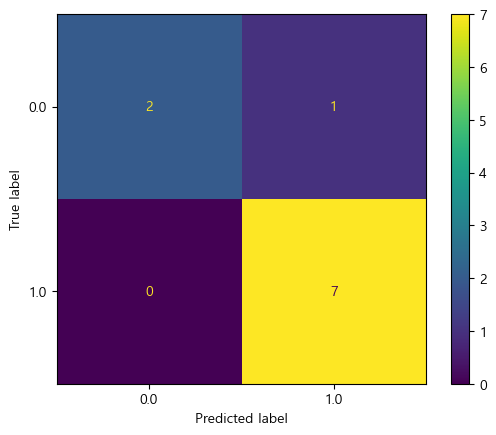

In [20]:
# 오차 행렬도 그리기
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

In [21]:
# 정확도 model.score() 와 동일
accuracy_score(test_target[:10], test_pred)

0.9

In [22]:
# 정밀도 
precision_score(test_target[:10], test_pred)

0.875

In [23]:
# 재현율
recall_score(test_target[:10], test_pred)

1.0

In [24]:
# f1_score
f1_score(test_target[:10], test_pred)

0.9333333333333333

In [25]:
"""
<정확도(accuracy)>
 - 올바르게 예측된 데이터의 수를, 전체 데이터의 수로 나눈 값
 - 예측이 실제값과 얼마나 정확한가를 의미함
 - 산술식 : (TP + TN) / (TP + TN + FP + FN)
 
<정밀도(precision)>
 - 모델이 True(1)로 예측한 데이터 중 실제로  True(1)로 맞춘 데이터
 - 산술식 : TP / (TP + FP)
 
<재현율(recall)>
 - 실제로 True(1)로 데이터를 True(1)로 인식한 데이터
 - 위험한 오류(부정오류)로 인식한 데이터도 모두 포함
 - 산술식 : TP / (TP + FN)
 - 모델 선정에 깊은 관여를 함

<f1_score>
 - 정밀도와 재현율을 조합하여 하나의 통계치로 반환한 값
 - 정밀도와 재현율의 조화 평균
 - 값이 높을수록, 성능이 높은 모델이라고 판단할 수 있음(최종 모델 선정 기준이 됨)
 - 산술식 : 2 * (정밀도 * 재현율) / (정밀도  + 재현율)

[최종 모델 선정 방법]
 - 과소 및 과대적합 확인
 - 정확도,  정밀도, 재현율, f1_score 모두 1차 확인
 - f1_score가 가장 높은 모델 선정
   (선정 시 재현율 다시한번 확인)
 - f1_score가 동일한 모델이면, 재현율이 높은 모델 순으로 선정
 - 재현율, f1_score 값이 가장 높은 모델 가장 BEST한 모델
"""

'\n<정확도(accuracy)>\n - 올바르게 예측된 데이터의 수를, 전체 데이터의 수로 나눈 값\n - 예측이 실제값과 얼마나 정확한가를 의미함\n - 산술식 : (TP + TN) / (TP + TN + FP + FN)\n \n<정밀도(precision)>\n - 모델이 True(1)로 예측한 데이터 중 실제로  True(1)로 맞춘 데이터\n - 산술식 : TP / (TP + FP)\n \n<재현율(recall)>\n - 실제로 True(1)로 데이터를 True(1)로 인식한 데이터\n - 위험한 오류(부정오류)로 인식한 데이터도 모두 포함\n - 산술식 : TP / (TP + FN)\n - 모델 선정에 깊은 관여를 함\n\n<f1_score>\n - 정밀도와 재현율을 조합하여 하나의 통계치로 반환한 값\n - 정밀도와 재현율의 조화 평균\n - 값이 높을수록, 성능이 높은 모델이라고 판단할 수 있음(최종 모델 선정 기준이 됨)\n - 산술식 : 2 * (정밀도 * 재현율) / (정밀도  + 재현율)\n\n[최종 모델 선정 방법]\n - 과소 및 과대적합 확인\n - 정확도,  정밀도, 재현율, f1_score 모두 1차 확인\n - f1_score가 가장 높은 모델 선정\n   (선정 시 재현율 다시한번 확인)\n - f1_score가 동일한 모델이면, 재현율이 높은 모델 순으로 선정\n - 재현율, f1_score 값이 가장 높은 모델 가장 BEST한 모델\n'

In [26]:
test_pred = rf.predict(test_std_scaled)

In [27]:
cm = confusion_matrix(test_target, test_pred, labels=rf.classes_)
cm

array([[266,  75],
       [ 69, 890]])

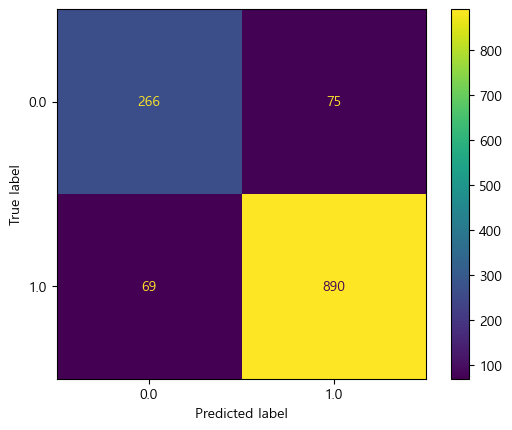

In [28]:
disp = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
disp.plot()

In [29]:
# 정확도 model.score() 와 동일
acs = accuracy_score(test_target, test_pred)
# 정밀도 
ps = precision_score(test_target, test_pred)
# 재현율
rs = recall_score(test_target, test_pred)
# f1_score
f1s = f1_score(test_target, test_pred)

print(f"정확도 : {acs}")
print(f"정밀도 : {ps}")
print(f"재현율 : {rs}")
print(f"f1_score : {f1s}")

정확도 : 0.8892307692307693
정밀도 : 0.9222797927461139
재현율 : 0.9280500521376434
f1_score : 0.9251559251559252


# 각 모델에 대해서 하이퍼파라미터 튜닝

In [30]:
# 랜덤포레스트 모델
# - 트리의 갯수(n_estimators) : 10개
# - 사용할 CPU zhdj rot tn(n_jobs) : 전부
# - 모델이 내부적으로 패턴을 찾는 랜덤규칙(random_state) : 42

# 위 하이퍼파라미터 및 모델 설정값들을 이용해서 모델 생성
rm = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)
rm

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [39]:
rm = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

### 훈련시키기
rm.fit(train_std_scaled, train_target)
### 훈련 정확도 확인
rm.score(train_std_scaled, train_target)

train_pred = rm.predict(train_std_scaled)
### 테스트 정확도 확인

# 정확도 model.score() 와 동일
train_acs = accuracy_score(train_target, train_pred)
# 정밀도 
ps = precision_score(train_target, train_pred)
# 재현율
rs = recall_score(train_target, train_pred)
# f1_score
f1s = f1_score(train_target, train_pred)
print("train 테이터")
print(f"정확도 : {acs}")
print(f"정밀도 : {ps}")
print(f"재현율 : {rs}")
print(f"f1_score : {f1s}")
print("----------------------")
### 훈련 및 테스트 정확도 출력
test_pred = rm.predict(test_std_scaled)
# 정확도 model.score() 와 동일
acs = accuracy_score(test_target, test_pred)
# 정밀도 
ps = precision_score(test_target, test_pred)
# 재현율
rs = recall_score(test_target, test_pred)
# f1_score
f1s = f1_score(test_target, test_pred)

print(f"정확도 : {acs}")
print(f"정밀도 : {ps}")
print(f"재현율 : {rs}")
print(f"f1_score : {f1s}")

print("----------------------")
print(train_acs - acs)

train 테이터
정확도 : 0.8753846153846154
정밀도 : 0.994667343829355
재현율 : 0.9944148260979944
f1_score : 0.9945410689348737
----------------------
정확도 : 0.8753846153846154
정밀도 : 0.9252934898612594
재현율 : 0.9040667361835245
f1_score : 0.9145569620253164
----------------------
0.11634138038217312


In [41]:
rm = RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42)

### 훈련시키기
rm.fit(train_std_scaled, train_target)
### 훈련 정확도 확인
rm.score(train_std_scaled, train_target)

train_pred = rm.predict(train_std_scaled)
### 테스트 정확도 확인

# 정확도 model.score() 와 동일
train_acs = accuracy_score(train_target, train_pred)
# 정밀도 
ps = precision_score(train_target, train_pred)
# 재현율
rs = recall_score(train_target, train_pred)
# f1_score
f1s = f1_score(train_target, train_pred)
print("train 테이터")
print(f"정확도 : {train_acs}")
print(f"정밀도 : {ps}")
print(f"재현율 : {rs}")
print(f"f1_score : {f1s}")
print("----------------------")
### 훈련 및 테스트 정확도 출력
test_pred = rm.predict(test_std_scaled)
# 정확도 model.score() 와 동일
acs = accuracy_score(test_target, test_pred)
# 정밀도 
ps = precision_score(test_target, test_pred)
# 재현율
rs = recall_score(test_target, test_pred)
# f1_score
f1s = f1_score(test_target, test_pred)

print(f"정확도 : {acs}")
print(f"정밀도 : {ps}")
print(f"재현율 : {rs}")
print(f"f1_score : {f1s}")

print("----------------------")
print(train_acs - acs)

train 테이터
정확도 : 0.9834519915335771
정밀도 : 0.9875980764363452
재현율 : 0.9906067529829906
f1_score : 0.9891001267427123
----------------------
정확도 : 0.8723076923076923
정밀도 : 0.910880829015544
재현율 : 0.9165797705943691
f1_score : 0.9137214137214137
----------------------
0.11114429922588476


In [42]:
rm = RandomForestClassifier(n_estimators=3, n_jobs=-1, random_state=42)

### 훈련시키기
rm.fit(train_std_scaled, train_target)
### 훈련 정확도 확인
rm.score(train_std_scaled, train_target)

train_pred = rm.predict(train_std_scaled)
### 테스트 정확도 확인

# 정확도 model.score() 와 동일
train_acs = accuracy_score(train_target, train_pred)
# 정밀도 
ps = precision_score(train_target, train_pred)
# 재현율
rs = recall_score(train_target, train_pred)
# f1_score
f1s = f1_score(train_target, train_pred)
print("train 테이터")
print(f"정확도 : {train_acs}")
print(f"정밀도 : {ps}")
print(f"재현율 : {rs}")
print(f"f1_score : {f1s}")
print("----------------------")
### 훈련 및 테스트 정확도 출력
test_pred = rm.predict(test_std_scaled)
# 정확도 model.score() 와 동일
acs = accuracy_score(test_target, test_pred)
# 정밀도 
ps = precision_score(test_target, test_pred)
# 재현율
rs = recall_score(test_target, test_pred)
# f1_score
f1s = f1_score(test_target, test_pred)

print(f"정확도 : {acs}")
print(f"정밀도 : {ps}")
print(f"재현율 : {rs}")
print(f"f1_score : {f1s}")

print("----------------------")
print(train_acs - acs)

train 테이터
정확도 : 0.9742158937848759
정밀도 : 0.9800656068634872
재현율 : 0.986037065244986
f1_score : 0.9830422677803088
----------------------
정확도 : 0.8707692307692307
정밀도 : 0.9031600407747197
재현율 : 0.9238790406673618
f1_score : 0.9134020618556701
----------------------
0.1034466630156452


# 엑스트라트리(ExtraTree) 모델
- 랜덤포레스트와 유사
- 디폴트로 트리 100개 사용
- 계산속도가 랜덤포레스트보다 빠름

In [46]:
### 모델 생성
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)

### 훈련시키기
et.fit(train_std_scaled, train_target)

### 훈련 및테스트 정확도 확인
train_pred = et.predict(train_std_scaled)
test_pred = et.predict(test_std_scaled)

train_acs = accuracy_score(train_target, train_pred)
test_acs = accuracy_score(test_target, test_pred)

print(train_acs - test_acs)

0.11076745459658677


In [ ]:
### 모델 생성
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)

### 훈련시키기
et.fit(train_std_scaled, train_target)

### 훈련 및테스트 정확도 확인
train_pred = et.predict(train_std_scaled)
test_pred = et.predict(test_std_scaled)

train_acs = accuracy_score(train_target, train_pred)
test_acs = accuracy_score(test_target, test_pred)

print(train_acs - test_acs)

# 그레디언트부스트(Gradient boosting) 모델
- 기존 훈련 모델들의 성능이 좋지 않을 때 주로 사용하는 모델
- 랜덤포레스트 및 엑스트라트리보다 속도가 느림
- 트리 기본값 : 100
- *일반화*에 강한 모델

In [49]:
### 모델 생성
gb = GradientBoostingClassifier(random_state=42)

### 훈련시키기
gb.fit(train_std_scaled, train_target)

### 훈련 및테스트 정확도 확인
train_pred = gb.predict(train_std_scaled)
test_pred = gb.predict(test_std_scaled)

train_acs = accuracy_score(train_target, train_pred)
test_acs = accuracy_score(test_target, test_pred)

print(train_acs)
print(train_acs - test_acs)

0.8880123147969983
0.021089237873921363


# 히스트그레디언트부스트(HistGradient boosting) 모델
- 정확한 명칭 : 히스토그램 기반 그레디언트 부스팅 (Histogram Gradient boosting)
- 앙상블에서 가장 인기있는 모델
- 그레디언트부스트 의 속도를 개선한 모델
- 하이퍼파라미터 튜일을 하지 않아도 성능이 좋은 모델로 평가하고 있음

In [51]:
### 모델 생성
hgb = HistGradientBoostingClassifier(random_state=42)

### 훈련시키기
hgb.fit(train_std_scaled, train_target)

### 훈련 및테스트 정확도 확인
train_pred = hgb.predict(train_std_scaled)
test_pred = hgb.predict(test_std_scaled)

train_acs = accuracy_score(train_target, train_pred)
test_acs = accuracy_score(test_target, test_pred)

print(train_acs)
print(test_acs)
print(train_acs - test_acs)

0.924956705791803
0.8723076923076923
0.05264901348411066


정확도 : 0.8723076923076923
정밀도 : 0.9178082191780822
재현율 : 0.908237747653806
f1_score : 0.9129979035639413


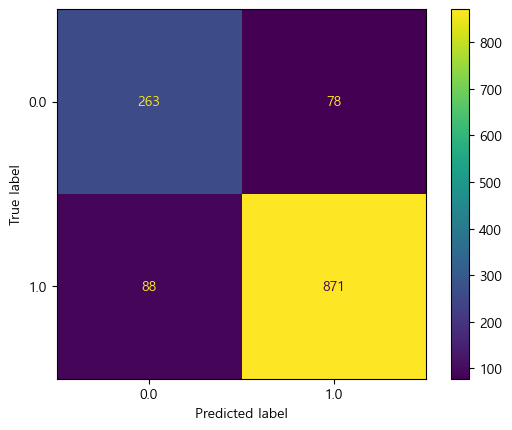

In [57]:
acs = accuracy_score(test_target, test_pred)
# 정밀도 
ps = precision_score(test_target, test_pred)
# 재현율
rs = recall_score(test_target, test_pred)
# f1_score
f1s = f1_score(test_target, test_pred)

print(f"정확도 : {acs}")
print(f"정밀도 : {ps}")
print(f"재현율 : {rs}")
print(f"f1_score : {f1s}")

cm = confusion_matrix(test_target, test_pred, labels=hgb.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=hgb.classes_)
disp.plot()

<해석>
 - HGB 모델의 훈련 모델은 0.92 아상의 매우 높은 정확도를 나타내고 있으며,
 - 재현율 0.91, f1-score 0.91의 매우 높은 평가 지표를 나타내고 있음
 - 따라서, 와인분류를 위해 HGB모델을 활용하는데 문제가 없을 것으로 판단함

# 엑스지비(XGB) 모델
- HGB 모델과 유사한 성능을 나타냄
- sklearn 패키지에 포함되어 있지 않음

In [59]:
from xgboost import XGBClassifier
from sklearn import set_config
set_config(display="text")

In [61]:
xgb = XGBClassifier(random_state = 42)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [62]:
### 훈련시키기
xgb.fit(train_std_scaled, train_target)

### 훈련 및테스트 정확도 확인
train_pred = xgb.predict(train_std_scaled)
test_pred = xgb.predict(test_std_scaled)

train_acs = accuracy_score(train_target, train_pred)
test_acs = accuracy_score(test_target, test_pred)

print(train_acs)
print(test_acs)
print(train_acs - test_acs)

0.9513180681162209
0.88
0.07131806811622088


정확도 : 0.88
정밀도 : 0.9204188481675393
재현율 : 0.9165797705943691
f1_score : 0.9184952978056427


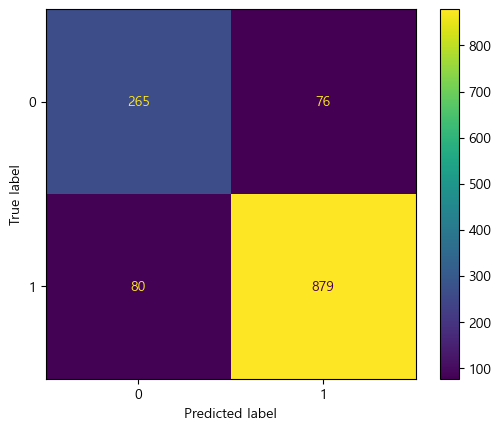

In [66]:
acs = accuracy_score(test_target, test_pred)
# 정밀도 
ps = precision_score(test_target, test_pred)
# 재현율
rs = recall_score(test_target, test_pred)
# f1_score
f1s = f1_score(test_target, test_pred)

print(f"정확도 : {acs}")
print(f"정밀도 : {ps}")
print(f"재현율 : {rs}")
print(f"f1_score : {f1s}")

cm = confusion_matrix(test_target, test_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=xgb.classes_)
disp.plot()

# 전체 모델에 대한 결과를 데이터프레임의 행렬 표로 만들기
- 데이터프레임 변수명 : df
- 사용 모델 5 개 : rm, et, gb, hgb, xgb 모델 사용하여 아래 컬럼에 대한 결과값 추출
- 컬럼명 : 모델명, 훈련정확도, 예측정확도, 정밀도, 재현율, f1-score, 훈련-예측
- 함수 이용하기 : 함수명은 getResult()

In [97]:
rm = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

model_list = [rm, et, gb, hgb, xgb]

In [85]:

### 훈련시키기
xgb.fit(train_std_scaled, train_target)

### 훈련 및테스트 정확도 확인
train_pred = xgb.predict(train_std_scaled)
test_pred = xgb.predict(test_std_scaled)

train_acs = accuracy_score(train_target, train_pred)
test_acs = accuracy_score(test_target, test_pred)

ac = accuracy_score(test_target, test_pred)
# 정밀도 
ps = precision_score(test_target, test_pred)
# 재현율
rs = recall_score(test_target, test_pred)
# f1_score
f1s = f1_score(test_target, test_pred)

ac_diff = train_acs - test_acs


df_tmp = pd.DataFrame(columns=['모델명', '훈련정확도','예측정확도','정밀도','재현율','f1-score','훈련-예측'])
df_tmp.loc[0] = [xgb.__class__.__name__, train_acs, test_acs, ps, rs, f1s, ac_diff]
# df_tmp = pd.DataFrame()
# df_tmp["모델명"] = xgb.__class__.__name__
# df_tmp["훈련정확도"] = train_acs
# df_tmp["예측정확도"] = test_acs
# df_tmp["정밀도"] = ps
# df_tmp["재현율"] = rs
# df_tmp["f1-score"] = f1s
# df_tmp["훈련-예측"] = ac_diff
# print(xgb.__class__.__name__)
# print(train_acs, test_acs, ps, rs, f1s, ac_diff)



# df_tmp["모델명"] = xgb.__class__.__name__
df_tmp

,모델명,훈련정확도,예측정확도,정밀도,재현율,f1-score,훈련-예측
0,XGBClassifier,0.951318,0.88,0.920419,0.91658,0.918495,0.071318


In [98]:
df = pd.DataFrame(columns=['모델명', '훈련정확도','예측정확도','정밀도','재현율','f1-score','훈련-예측'])

def getResult(model):
    model.fit(train_std_scaled, train_target)

    ### 훈련 및테스트 정확도 확인
    train_pred = model.predict(train_std_scaled)
    test_pred = model.predict(test_std_scaled)
    
    train_acs = accuracy_score(train_target, train_pred)
    test_acs = accuracy_score(test_target, test_pred)
    
    ac = accuracy_score(test_target, test_pred)
    # 정밀도 
    ps = precision_score(test_target, test_pred)
    # 재현율
    rs = recall_score(test_target, test_pred)
    # f1_score
    f1s = f1_score(test_target, test_pred)
    
    ac_diff = train_acs - test_acs

    return [model.__class__.__name__, train_acs, test_acs, ps, rs, f1s, ac_diff]

for i in range(len(model_list)):
    name, train_acs, test_acs, ps, rs, f1s, ac_diff = getResult(model_list[i])
    df. = [name, train_acs, test_acs, ps, rs, f1s, ac_diff]
    
df


,모델명,훈련정확도,예측정확도,정밀도,재현율,f1-score,훈련-예측
0,RandomForestClassifier,0.996921,0.889231,0.922280,0.928050,0.925156,0.107691
1,ExtraTreesClassifier,0.996921,0.886154,0.915897,0.931178,0.923475,0.110767
2,GradientBoostingClassifier,0.888012,0.866923,0.905155,0.915537,0.910316,0.021089
3,HistGradientBoostingClassifier,0.924957,0.872308,0.917808,0.908238,0.912998,0.052649
4,XGBClassifier,0.951318,0.880000,0.920419,0.916580,0.918495,0.071318


In [91]:
df

,모델명,훈련정확도,예측정확도,정밀도,재현율,f1-score,훈련-예측
0,RandomForestClassifier,0.996921,0.886923,0.920290,0.927007,0.923636,0.109998
1,ExtraTreesClassifier,0.996921,0.880769,0.912731,0.927007,0.919814,0.116152
2,GradientBoostingClassifier,0.888012,0.866923,0.905155,0.915537,0.910316,0.021089
3,HistGradientBoostingClassifier,0.924957,0.872308,0.917808,0.908238,0.912998,0.052649
4,XGBClassifier,0.951318,0.880000,0.920419,0.916580,0.918495,0.071318


In [92]:
df

In [94]:
df

,모델명,훈련정확도,예측정확도,정밀도,재현율,f1-score,훈련-예측


In [95]:
df.loc[0] = [1,2,3,4,5,6,7]
df

,모델명,훈련정확도,예측정확도,정밀도,재현율,f1-score,훈련-예측
0,1,2,3,4,5,6,7


In [ ]:
df.fi